In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math
from scipy import signal
from scipy.fftpack import fft
from scipy import ndimage
from scipy import special
import math
%matplotlib inline

In [2]:
def K(x,s):
    return(np.exp(-(x/s)**2))/s/np.sqrt(np.pi)

In [3]:
def Retina_Mechine_1D(stimulus, sigma_dict, para_dict, dx, dt, loc_dict = 1):
    if loc_dict == 1:
        loc_dict = {}
        loc_dict['C'] = 1
        loc_dict['H'] = 1
        
    klen = max(sigma_dict.values())*5
    xx = np.arange(-klen,klen,dx)
    KC = K(xx,sigma_dict['C'])
    KH = K(xx,sigma_dict['H'])

    output = np.zeros_like(stimulus)#y output
    zts = np.zeros_like(stimulus)#horizontal
    sstm = np.zeros_like(stimulus)
    
    if 'tau_y' in sigma_dict.keys():
        T = np.arange(int(sigma_dict['tau_y']/dt*8))*dt
        Ky=T/sigma_dict['tau_y'] /sigma_dict['tau_y'] *np.exp(-T/sigma_dict['tau_y'])
        for j in range(np.shape(stimulus)[1]):
            for i in range(len(Ky)-1):
                for ii in range(i+1):
                    sstm[i,j] += stimulus[ii,j]*Ky[i-ii]*dt
            sx = np.convolve(stimulus[:,j],Ky,'valid')*dt
            sstm[len(Ky)-1:,j] = sx.copy()
    else:
        sstm = stimulus.copy()

    for i in range(nstep-1):
        s = sstm[i,:]
        rs = np.convolve(s,KC,'same')*dx
        ry = np.convolve(output[i,:],KH,'same')# feedback from horizontal cell (y convoluted with horitonatl cell receptive field KH)
        rz = np.convolve(zts[i,:],KH,'same')# feedback from horizontal cell (z convoluted with horitonatl cell receptive field KH)

        dyj =(-para_dict['alpha']*output[i,:]+para_dict['k']*(rs-para_dict['phi']*rz))*dt
        dzj =(-para_dict['beta']*zts[i,:]+para_dict['g']*output[i,:])*dt
        output[i+1,:] = (output[i,:]+dyj)*loc_dict['C']
        zts[i+1,:] = (zts[i,:]+dzj)*loc_dict['H']
    return output, zts

In [4]:
sigma_h = 1# RF size of horizontal cell
sigma_c = sigma_h*2/3# RF size of cone cell
gamma = 1/(sigma_c**2)
klen = 2*sigma_h# half of width of horizontal kernal
dx = 0.01*sigma_h
xlen = 20*sigma_h #spatial extend of simulation
hw = 0.75*sigma_h#half bar width
tempx = np.arange(0,xlen,dx)
dt=0.01
nstep = 1600
moving_bar = np.zeros([nstep, int(xlen/dx)])
pos = 0
v = 0.5 #dx/step
hw = 10 #dx
pos = 600
speak = np.zeros(nstep)
for i in range(nstep):
    pos = pos+v
    moving_bar[i,max(int(pos-hw), 0):min(int(pos+hw), int(xlen/dx))] = 1
    speak[i] = pos*dt

In [5]:
para_dict = {}
para_dict['alpha'] = 1/0.024
para_dict['beta'] = 1./1.
para_dict['k'] = para_dict['alpha']*0.5
para_dict['phi'] = 1.
para_dict['g'] = para_dict['beta']
sigma_dict = dict()
sigma_dict['H'] = sigma_h
sigma_dict['C'] = sigma_dict['H']*2/3# RF size of cone cell
sigma_dict['tau_y'] = 0.02

In [6]:
output, zts = Retina_Mechine_1D(moving_bar, sigma_dict, para_dict, dx, dt)

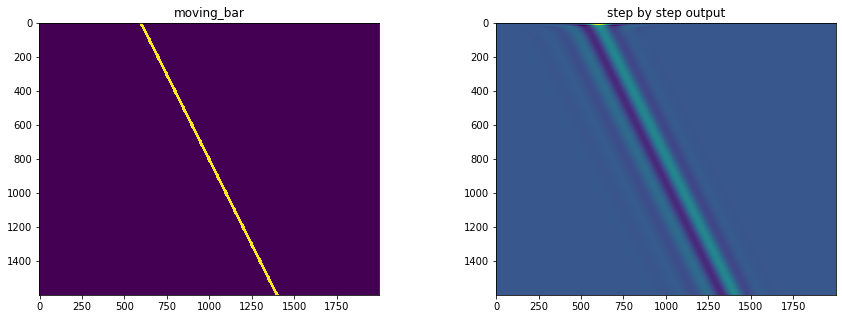

In [7]:
fig, (ax2, ax3) = plt.subplots(nrows=1, ncols=2) 
ax2.imshow(moving_bar)
ax2.set_title('moving_bar')
ax3.imshow(output)
ax3.set_title('step by step output')
fig.set_size_inches(15, 5)

In [8]:
nstep

1600

In [5]:
loadfiles = np.load('STkernels.npz')

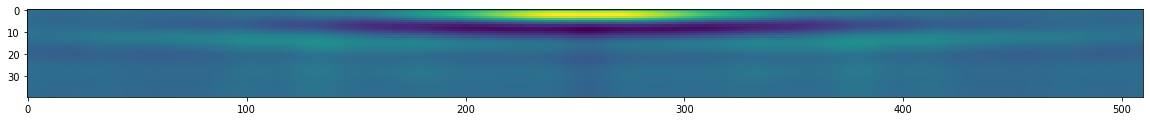

In [12]:
plt.imshow(ST_kernel[:,int(ST_kernel.shape[1]*0.35):int(ST_kernel.shape[1]*0.65)])
# plt.imshow(ST_kernel)
fig = plt.gcf()
fig.set_size_inches(20, 5)

In [19]:
loadfiles['time_axis']

array([-4.00000000e-01, -3.90000000e-01, -3.80000000e-01, -3.70000000e-01,
       -3.60000000e-01, -3.50000000e-01, -3.40000000e-01, -3.30000000e-01,
       -3.20000000e-01, -3.10000000e-01, -3.00000000e-01, -2.90000000e-01,
       -2.80000000e-01, -2.70000000e-01, -2.60000000e-01, -2.50000000e-01,
       -2.40000000e-01, -2.30000000e-01, -2.20000000e-01, -2.10000000e-01,
       -2.00000000e-01, -1.90000000e-01, -1.80000000e-01, -1.70000000e-01,
       -1.60000000e-01, -1.50000000e-01, -1.40000000e-01, -1.30000000e-01,
       -1.20000000e-01, -1.10000000e-01, -1.00000000e-01, -9.00000000e-02,
       -8.00000000e-02, -7.00000000e-02, -6.00000000e-02, -5.00000000e-02,
       -4.00000000e-02, -3.00000000e-02, -2.00000000e-02, -1.00000000e-02,
        3.33066907e-16,  1.00000000e-02,  2.00000000e-02,  3.00000000e-02,
        4.00000000e-02,  5.00000000e-02,  6.00000000e-02,  7.00000000e-02,
        8.00000000e-02,  9.00000000e-02])

In [4]:
np.convolve([1,2,3,4],[0,1], 'full')

array([0, 1, 2, 3, 4])

In [6]:
for k in loadfiles.keys():
    print(k)

time_axis
ori_kernel
arr_0
